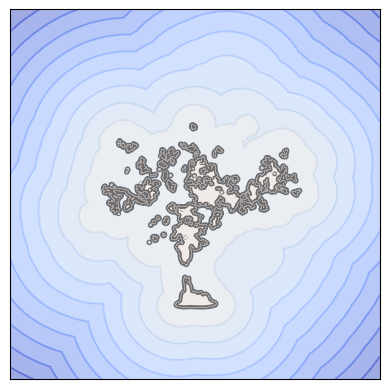

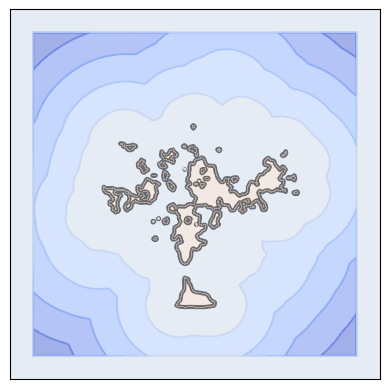

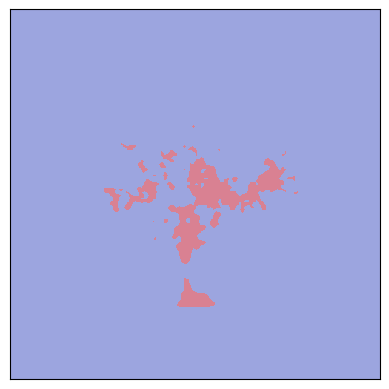

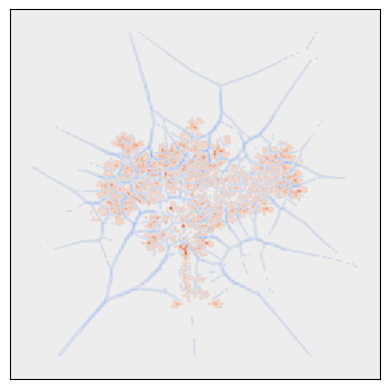

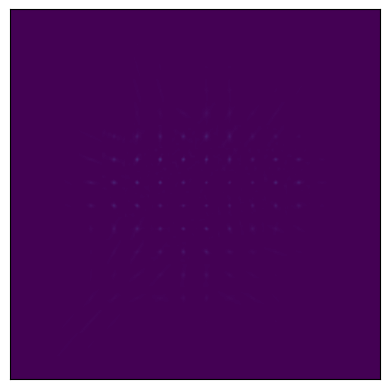

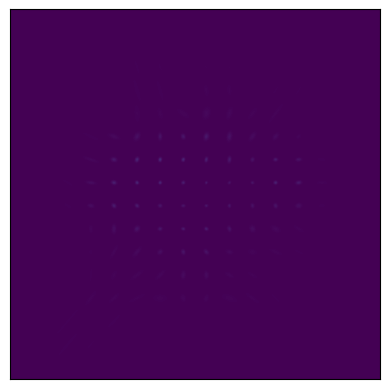

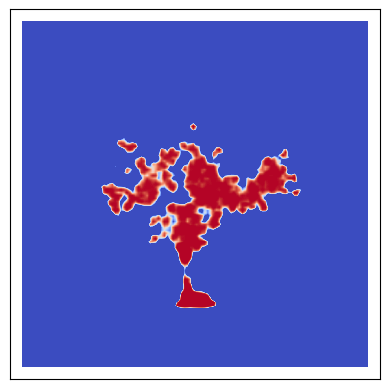

In [57]:
import numpy as np
import matplotlib.pyplot as plt

import utils
pref = "testing/est-acf/mesh/tree/"

dim = 2048

cutout_range = [
    (-0.2, 0.1),
    (-0.2, 0.1)
]

cutout_range = [
    (-1, 1),
    (-1, 1)
]

utils.plot_prior(pref + f"sdf-{dim}-values.bin", plt.gca(), levels=21)
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

utils.plot_prior(pref + "downsampled-mean.bin", plt.gca())
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

utils.plot_posterior(pref + "downsampled-mean.bin", plt.gca(), None, 1, "downsampled-mean", None)
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

utils.plot_prior(pref + "residual.bin", plt.gca(), level_set=False)
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

xs = np.linspace(-100,100,dim)
xx, yy = np.meshgrid(xs,xs)

middle_idx = len(xs) // 2

def plot_cov(file, ax, do_shift=False):
    realizations = np.fromfile(file, dtype=np.float64)
    res = int(np.sqrt(realizations.shape[0]))
    realizations = np.reshape(realizations, (res, res))
    realizations = realizations.transpose(1, 0)
    ax.pcolormesh(xx,yy, realizations, vmin=0, vmax=0.0005)
    #ax.set_xlim(-10,10)
    #ax.set_ylim(-10,10)
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    return realizations

def plot_occupancy(file, ax,):
    realizations = np.fromfile(file, dtype=np.float64)
    res = int(np.sqrt(realizations.shape[0]))
    realizations = np.reshape(realizations, (res, res))
    realizations = realizations.transpose(1, 0)
    ax.pcolormesh(xx,yy, np.log(np.maximum(realizations, 0.00000001)), cmap="coolwarm", alpha=0.5)
    #ax.pcolormesh(xx,yy, realizations, cmap="coolwarm", alpha=0.5)
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    return realizations

acf_fftw = plot_cov(pref + "acf-fftw.bin", plt.gca())
plt.show()

acf_fit = plot_cov(pref + "acf-fit.bin", plt.gca())
plt.show()

plot_occupancy(pref + "occupancy-values.bin", plt.gca())
plt.show()
